# 01. 차원축소 알고리즘
> 비지도학습 기법인 차원 축소에 대해 배워보고 실습해봅시다.

- toc: true 
- badges: true
- comments: true
- categories: [Day 5]
- permalink: /dimensional_reduction
- exec: colab

### 1. 차원이란?

우리가 아래와 같은 데이터를 갖고있다고 합시다. 그러면 이 데이터의 차원을 몇 차원일까요?

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile23.uf.tistory.com%2Fimage%2F99D7083359F0654824C156)
<br><br>

이전부터 이야기 했지만, 차원의 수는 우리가 가진 열의 수라고 보면 이해하기 쉽습니다. 왜 그런지는 아래 그림을 통해 이해해봅시다.

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile27.uf.tistory.com%2Fimage%2F99DC193359F066D21BB429)

이처럼 데이터를 공간상에 표현하면 축의 개수는 데이터의 열의 개수가 됩니다. 따라서 이 데이터는 3차원 데이터라고 부를 수 있습니다. 차원이 많으면 데이터가 많아서 좋을 것 같지만, 실제로는 그렇지 않습니다. 차원이 높아지면 문제가 발생하는데 아래에서 자세히 알아봅시다.
<br><br>


### 2. 차원의 저주

![](https://i0.wp.com/thesciencelife.com/wp-content/uploads/2017/10/dsb2-copy-1.jpg?w=770)

데이터 셋의 열(특성, feature)가 많아질수록, 데이터의 차원이 증가하게 됩니다. 그러나 이렇게 차원이 증가할 수록 데이터 공간의 부피가 기하 급수적으로 늘어나게 됩니다.
<br><br>

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile1.uf.tistory.com%2Fimage%2F99FF9F335B8A484A31820B)

위 그림은 데이터의 차원이 증가 할수록 단위부피 안에 포함되는 데이터의 개수를 의미합니다. 그림에서 알 수 있듯이 차원이 증가할 수록 데이터의 밀도가 희소(Sparse)하게 됩니다. <br><br>

데이터가 1차원일 때는 단위 공간안에 데이터 샘플이 3개가 포함되어있었습니다. 그러나 데이터가 2차원이 되면 단위 공간안에 데이터 샘플이 1개 포함되고, 3차원이 되면 더욱 희소해져서 데이터가 한개도 포함되지 않게 됩니다. 그럼 이게 왜 문제가 될까요?<br><br>

![](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile7.uf.tistory.com%2Fimage%2F9970CF495BA327E815A031)

이렇게 희소한(Sparse) 데이터를 이용해 머신러닝 알고리즘이 학습하게 되면 필요 이상의 처리량이 기하급수적으로 늘어납니다. 가령, KNN 알고리즘의 경우 거리를 계산할 때, 유클리디언 거리 등의 거리공식을 사용하는데, 2차원에서 $\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$이였던 거리가 3차원이 되면  $\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2}$ 이 되므로 차원이 늘어나면 늘어날 수록 연산량이 많아집니다. 또한 선형회귀, 로지스틱 회귀등도 데이터의 차원이 늘어나면 변수(x)의 개수가 늘어나는 것이므로 그에 따라 회귀계수(w)의 개수도 많아져서 연산량이 증가하게 됩니다. <br><br>

![](https://mblogthumb-phinf.pstatic.net/20160405_108/wjddudwo209_1459832334109siGRK_JPEG/%BD%BD%B6%F3%C0%CC%B5%E57.JPG?type=w2)

두번째로 높은 차원의 데이터를 학습하게 되면 모델 자체가 복잡해지게 됩니다. 가령, 분류모델을 학습시킨다고 하면 2차원에서는 간단한 직선으로도 해결되는 문제가 3차원으로 가면 복잡한 곡면이 되어야 하는 경우도 있습니다. 이렇게 모델을 복잡하게 만들다보면 오버피팅(Overfitting)의 가능성이 높아지게 됩니다.
<br><br>

또한 차원이 3차원보다 커지면 데이터를 시각화 할 수 없게 되어 눈으로 데이터를 확인하기 어려워지며, 데이터의 크기가 커져서 저장공간도 많이 차지하게 되는 등 문제가 발생합니다. 빅데이터 시대인만큼 데이터가 많으면 무조건 좋은줄만 알았는데, 그것도 아니죠? 그러면 이러한 차원을 어떻게 낮출 수 있을까요?




<br><br>

### 3. 특징 선택 (Feature Selection)

![](https://miro.medium.com/max/694/0*gz5XuPZfN0wAi66I)

가장 먼저 생각해볼 수 있는 것은 특징을 선택하는 것입니다. 특징선택 과정은 제가 데이터 분석을 진행하면서 자주 보여드렸습니다.
<br><br>

- 보스턴 집값 예제에서 2개의 열(방의 수, 하위계층 비율)만 사용.
- 타이타닉 예제에서 가족의 수를 친척의 수와 합쳐서 열의 개수를 줄임.
- 유방암 예측 예제에서 mean, worst, se 등으로 구성된 32개의 열을 12개로 줄임.
<br><br>

주로 상관계수 분석 등의 방법을 이용해서 중요한 특징(열)들만 사용하고, 중요하지 않은 특징(열)들은 제거하거나 합치는 방식으로 특징을 선택할 수 있고, 열의 수를 줄여나가서 차원을 감소시킬 수 있습니다.


<br>

### 4. 특징 추출 (Feature Extraction)

사실 오늘 배울 차원축소 알고리즘들은 특징 선택이 아닌 특징 추출 알고리즘들입니다. 여러가지 특징 추출 알고리즘이 있는데 그 중에 대표적인 알고리즘인 PCA 알고리즘에 대해 배워봅시다.

<br>

### 5. PCA (주 성분 분석)

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile1.uf.tistory.com%2Fimage%2F99EABC3E5B8A48781BEFA4)

PCA(주성분 분석) 알고리즘은 매우 이해하기 쉬운 차원축소 알고리즘입니다. PCA는 차원을 축소시키기 위해 투영(Projection)을 수행하는데, 투영에 대해서는 선형대수 시간에 배웠기 때문에 어느정도 잘 이해하시리라 믿습니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day6/01.png?raw=true)

예를 들어 위와 같은 데이터가 있다고 해봅시다. 위 데이터는 x1과 x2가 양의 상관관계를 가지고 있는 2차원 데이터라고 할 수 있습니다. 만약 이 데이터를 1차원으로 축소시키려면 어떻게 해야할까요? 가장 쉽게 생각 할 수 있는 것은 그냥 열 하나를 제거하는 것입니다. 
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day6/02.gif?raw=true)

데이터에서 x2 열을 제거해버리고 x1만 보게 되면 위와 같아집니다. 즉, (2, 1), (3, 5)와 같은 데이터에서 2번째 열을 지워버리고 (2), (3)과 같이 바라보는 것입니다. 
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day6/03.gif?raw=true)

아니면 데이터에서 x1열을 제거해버리고 x2축만 볼 수도 있겠죠? 즉, (2, 1), (3, 5)와 같은 데이터에서 1번째 열을 지워버리고 (1), (5)과 같이 바라보는 것입니다. 이런 방식으로 데이터에서 열을 지워버리면 분명히 차원은 축소되겠지만 정보가 엄청나게 유실되겠죠? 따라서 이렇게 그냥 열을 지워버리면 성능이 큰 폭으로 떨어지게 됩니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day6/04.gif?raw=true)

그렇다면 위 처럼 데이터의 특징은 잘 설명하는 축을 찾고 여기에 데이터를 투영하면 어떻게 될까요? 데이터의 특징이 잘 유지되면서 차원은 줄어들게 됩니다. 위의 과정이 바로 PCA라고 이해하시면 됩니다. 그러면 저 투영할 축을 어떻게 찾아낼 수 있을까요? 


<br>

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile28.uf.tistory.com%2Fimage%2F99AC093E5B8A4904213CC3)

PCA는 우선 데이터의 분산이 최대인 지점을 찾아냅니다. 만약 위와 같은 사진에서 직선 C1으로 투영하게 되면 데이터들이 가장 넓게 벌어져있으므로, 분산이 클 것이고(분산=평균과 데이터 간의 차이)  C2로 투영하면 데이터가 너무 좁게 벌어져있으므로, 분산이 작을 것입니다. 따라서 C1과 같은 직선을 찾습니다.
<br><br>

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile6.uf.tistory.com%2Fimage%2F996F65335B8A493207D19B)

이러한 직선(축)들을 PC(Principle Component, 주성분)이라고 합니다. 주성분을 구할 때는 공분산과 고유벡터를 사용하는데요. 간단하게 알아보고 갑시다. <br><br>

![](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F2533B54B58BD19341C)

공분산은 이미 통계시간에 배운 내용입니다. 공분산이란 변수들의 상관관계를 나타내기 위해 사용하는 것으로 값이 양수이면 양의 상관관계, 값이 음수이면 음의 상관관계가 된다고 했었죠.
<br><br>

고유벡터(Eigen Vector)는 선형대수에 나오는 개념이지만 이전에 다루지 않았던 개념인데요. 간단하게만 설명하자면 **어떠한 변환 이후에도 방향이 고정되어있는 벡터**를 의미합니다. 즉 어떠한 변환 이후에도 고정되어 있으니, 해당 변환의 축과 같은 역할을 하는 벡터를 고유벡터라고 합니다. 말이 어렵죠? 눈으로 보면 정말 쉽습니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day6/05.gif?raw=true)

가령, $\begin{bmatrix} 3 & 1 \\ 0 & 2\end{bmatrix}$와 같은 행렬이 있다고 해봅시다. 이전부터 계속 말했지만, 행렬은 곧 벡터를 변환시키는 일종의 함수와 같다고 했었죠. 이 변환을 통해 기저벡터 $\hat{i} = \begin{bmatrix} 1 \\ 0\end{bmatrix}$은 $\begin{bmatrix} 3 \\ 0\end{bmatrix}$이 되고, 기저벡터 $\hat{j} = \begin{bmatrix} 0 \\ 1\end{bmatrix}$은 $\begin{bmatrix} 1 \\ 2\end{bmatrix}$가 됩니다. <br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day6/06.gif?raw=true)

이러한 변환을 수행해도 방향이 변하지 않는 벡터가 있는데요. 이러한 벡터를 해당 변환의 고유벡터(Eigen Vector)라고 부릅니다. 각 변환마다 고유한 고유벡터를 가지고 있고, 몇몇 변환은 고유벡터가 없는 경우도 있습니다. (e.g. 90도 회전과 같은 변환은 고유벡터 X)
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day6/07.gif?raw=true)

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day6/08.gif?raw=true)

이러한 고유벡터는 변환을 해도 방향이 변하지 않기 때문에 꼭 그 변환의 축과 같이 보이게 됩니다. 즉, 회전 등을 할 때 그 벡터를 잡고 돌리는 것 처럼 보이게 됩니다. 그 것이 축의 개념이니까요. 
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day6/09.gif?raw=true)

이러한 벡터가 해당 변환의 고유벡터(Eigen Vector)이고, 방향은 유지되지만 길이가 달라진다면 얼마나 달라지는지가 바로 고유치(Eigen Value)입니다. 위 예시의 경우 $\begin{bmatrix} -1 \\ 1\end{bmatrix}$과 같은 벡터는 고유 벡터가 되고, 늘어난 길이인 $2$배는 고유치 $2$가 됩니다.
<br><br>

실제로 선형대수 시간에 고유벡터부분을 배워보면 $A \cdot \vec{v} = \lambda\vec{v}$와 같이 배우는데요. 이 말은 어떠한 벡터 $\vec{v}$를 행렬 $A$에 의해 변환 시킨 것이 $\vec{v}$에 $\lambda$를 스칼라 곱 한것과 같다라는 의미를 지니게 됩니다. 즉, 방향은 절대 변하지 않고 크기만 변할 수 있는 벡터를 고유벡터라고 합니다. <br><br>


 실제로 이 고유벡터를 계산하려면 $\lambda$를 $\lambda I$로 만들어서 $A \cdot \vec{v} = \lambda I \cdot \vec{v}$이고, $A \cdot \vec{v} - \lambda I \cdot \vec{v} = 0$이기 때문에,$ (A - \lambda I) \vec{v} = 0$이라고 놓고 계산을 하게 되는데, 이 과정까지 이해하려면 determinant나 역행렬 등에 대해 알아야 하므로 때문에 배보다 배꼽이 커집니다. 따라서 여기에서는 자세한 계산과정은 생략하겠습니다. 여기서 아셔야 할 것은 고유벡터라는 것이 변환에도 불구하고 방향이 변하지 않는, 일종의 변환의 축과 같은 벡터라고 이해하시면 됩니다.
 <br><br>



![](https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2019-07-27_PCA/pics_mtx1.png)

이제 다시 PCA로 돌아와보겠습니다. 가장 먼저 각 열의 공분산을 행렬로써 표시합니다. 만약 a와 b 사이의 공분산을 $cov(a, b)$라고 할 때, 각각 $cov(x, x)$, $cov(x, y) = cov(y, x)$, $cov(y, y)$를 이용해서 아래와 같은 행렬을 만들 수 있습니다.
<br><br>

![](https://t1.daumcdn.net/cfile/tistory/22183E505954C59520)

이 행렬을 우리는 공분산 행렬이라고 부릅니다. 이제 이 공분산 행렬의 고유벡터를 구하고 나서, 데이터와 행렬 내적을 수행하면 PC 벡터들이 계산됩니다. 즉, 주성분 $PC_i = X \cdot eigen_i$로 계산됩니다. 파이썬 코드로 함께 보겠습니다.


In [1]:
import pandas as pd

df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

In [2]:
# PCA를 이용해 5차원의 데이터를 1차원으로 압축합니다.

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [3]:
df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [4]:
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]

In [5]:
X.head(9)

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0


In [6]:
Y = df[['body_shape']] # y는 라벨

In [7]:
Y.head(10)

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


In [8]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X) # 표준화

In [9]:
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [10]:
import numpy as np

In [11]:
features = x_std.T
covariance_matrix = np.cov(features) # 공분산 행렬 계산
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [12]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix) # 고유벡터 계산

In [13]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [14]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [15]:
eig_vals[0] / sum(eig_vals) 
# 73%의 보존률로 축소할 수 있음

0.7318321731427544

In [16]:
projected_X = x_std.dot(eig_vecs.T[0]) # 고유벡터로 투영

In [17]:
projected_X

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [18]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y

In [19]:
result.head(10)

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'PCA result')

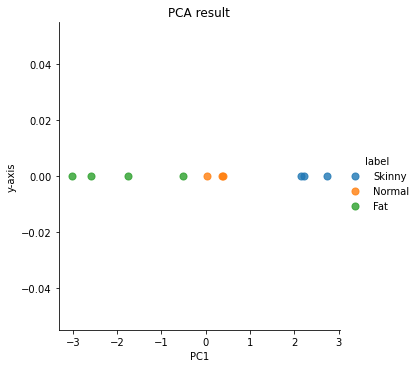

In [21]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('PCA result')

이렇게 계산되는 이유는 해당하는 분산을 가진 어떠한 분포가 있다고 합시다. 그 분포를 행렬로써 표현했기 때문에 공분산 행렬은 해당 분포가 가진 방향으로의 변환이라고 이해할 수 있습니다. 따라서 공분산 행렬의 고유벡터는 그 방향으로 변환한다고 해도 변하지 않는, 공분산 행렬의 축이 되는 벡터로써 아래와 같은 벡터가 됩니다.

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day6/10.png?raw=true)
<br>

제가 내적에 대한 정의를 말씀 드릴 때, 내적은 해당 방향 안으로 들어가서 곱하는 것이라고 했습니다. 때문에 데이터 X를 분포의 방향을 나타내는 고유벡터와 내적하면, 데이터를 고유벡터의 방향 안에 투영한 것 처럼 됩니다. 어려우실텐데 이해가 좀 가시나요? 그런데 PCA를 항상 이렇게 계산해야하면 너무 어렵겠죠. 다행히도 `from sklearn.decomposition import PCA`라는 클래스를 이용하면 매우 쉽게 PCA를 이용할 수 있습니다.

In [22]:
# 5차원 -> 1차원

from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)

In [23]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y
sklearn_result

,PC1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


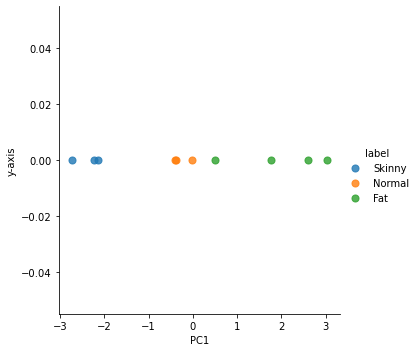

In [24]:
sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

In [25]:
# 5차원 -> 2차원

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
sklearn_pca_x = pca.fit_transform(x_std)

In [26]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1', 'PC2'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sklearn_result

,PC1,PC2,y-axis,label
0,-2.226009,-0.549365,0.0,Skinny
1,-0.018143,-0.238719,0.0,Normal
2,1.762966,0.368687,0.0,Fat
3,-2.735424,0.454498,0.0,Skinny
4,3.027115,-0.413051,0.0,Fat
5,-2.147026,-0.834491,0.0,Skinny
6,-0.371425,-1.053806,0.0,Normal
7,2.592399,-0.398508,0.0,Fat
8,-0.393478,2.094204,0.0,Normal
9,0.509025,0.570551,0.0,Fat


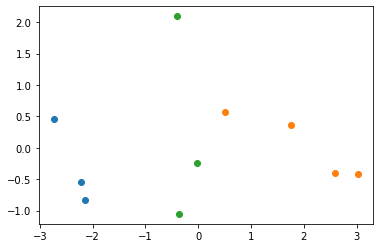

In [27]:
from matplotlib import pyplot as plt

skinny = sklearn_result[sklearn_result['label'] == 'Skinny']
fat = sklearn_result[sklearn_result['label'] == 'Fat']
normal = sklearn_result[sklearn_result['label'] == 'Normal']

plt.scatter(skinny['PC1'], skinny['PC2'])
plt.scatter(fat['PC1'], fat['PC2'])
plt.scatter(normal['PC1'], normal['PC2'])

plt.show()
plt.close()

In [28]:
# 5차원 -> 3차원

from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
sklearn_pca_x = pca.fit_transform(x_std)

In [29]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1', 'PC2', 'PC3'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sklearn_result

,PC1,PC2,PC3,y-axis,label
0,-2.226009,-0.549365,0.926748,0.0,Skinny
1,-0.018143,-0.238719,0.001737,0.0,Normal
2,1.762966,0.368687,0.642992,0.0,Fat
3,-2.735424,0.454498,-0.670517,0.0,Skinny
4,3.027115,-0.413051,-0.330717,0.0,Fat
5,-2.147026,-0.834491,-0.569383,0.0,Skinny
6,-0.371425,-1.053806,0.422756,0.0,Normal
7,2.592399,-0.398508,-0.243047,0.0,Fat
8,-0.393478,2.094204,0.273781,0.0,Normal
9,0.509025,0.570551,-0.454351,0.0,Fat


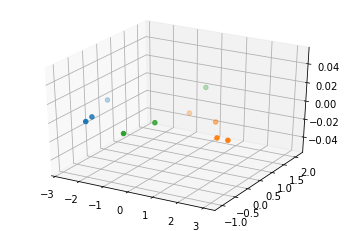

In [30]:
from matplotlib import pyplot as plt

skinny = sklearn_result[sklearn_result['label'] == 'Skinny']
fat = sklearn_result[sklearn_result['label'] == 'Fat']
normal = sklearn_result[sklearn_result['label'] == 'Normal']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(skinny['PC1'], skinny['PC2'])
ax.scatter(fat['PC1'], fat['PC2'])
ax.scatter(normal['PC1'], normal['PC2'])

plt.show()
plt.close()

<br><br>

### 6. PCA를 이용한 데이터 압축

PCA는 위 처럼 4차원 이상의 데이터를 시각화 하는데에 사용할 수도 있고, 데이터를 압축할 때도 유용하게 사용 가능합니다. 아래 예제를 실행해봅시다.

In [31]:
from tensorflow.keras.datasets import mnist

In [32]:
train, test = mnist.load_data()

train_x, train_y = train
test_x, test_y = test

# MNIST (손글씨 데이터셋) 로드

11493376/11490434 [==============================] - 1s 0us/step


In [33]:
train_x = train_x.reshape(-1, 784)

In [34]:
from sklearn.decomposition import PCA
# 시간이 조금 걸립니다.

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(train_x)

In [35]:
print('선택한 차원(픽셀) 수 :', pca.n_components_)
# 784 차원에서 154 차원으로 차원 축소 성공

선택한 차원(픽셀) 수 : 154


In [36]:
# 다시 784차원으로 복원

X_recovered = pca.inverse_transform(X_reduced)

In [37]:
from matplotlib import pyplot as plt
import matplotlib

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

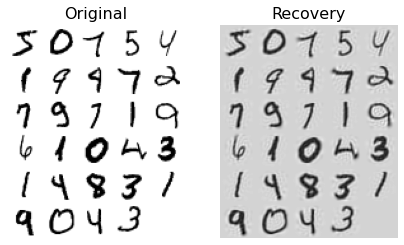

In [38]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Recovery", fontsize=16)
plot_digits(X_recovered[::2100])

<br>

### 7. Incremental PCA (IPCA)

PCA의 단점은 SVD(scikit-learn에서)를 수행하기 위해서는 전체 학습 데이터셋을 메모리에 올려야 한다는 것입니다 이러한 단점을 보완하기 위해 Incremental PCA(IPCA) 알고리즘이 개발되었습니다.
<br><br>

IPCA는 학습 데이터셋을 잘게 쪼갠 뒤 IPCA 알고리즘에 입력으로 넣어줍니다. 쪼개진 데이터들을 입력으로 넣어서 PCA를 수행하면 한번에 모든 데이터를 메모리에 올리지 않아도 됩니다.


In [39]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

for batch in np.array_split(train_x, n_batches):
  print(".", end="")
  inc_pca.partial_fit(batch) # 잘게 쪼개서 부분적으로 학습

x_reduced = inc_pca.transform(train_x)

....................................................................................................

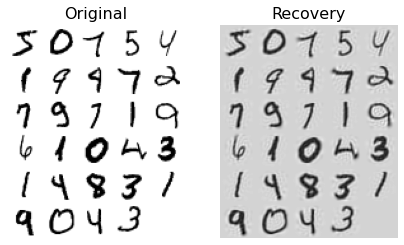

In [40]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Recovery", fontsize=16)
plot_digits(X_recovered[::2100])

여러분의 데이터가 너무 많은 열을 가지고 있어서 시각화가 어렵다면 PCA를 수행해서 차원을 줄이고 시각화해보세요. 또한 PCA 말고도 다양한 차원축소 알고리즘이 존재하지만, 난이도와 시간상의 문제로 차원축소 알고리즘은 여기서 마칩니다. 추가적인 차원축소 알고리즘을 공부해보시고 싶으시다면 LDA, SVD, NMF 등을 추가로 공부하시는 것을 추천드립니다.